In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family']='serif'
rcParams['font.size']=16
from numpy import sin,cos,exp,arctan,sqrt,pi,cosh
import matplotlib.pyplot as plt

In [2]:
l=10.
nx=101
x=numpy.linspace(0,l,nx)
dx=l/(nx-1)
nt=200
dt=0.02
lamda=dt/dx

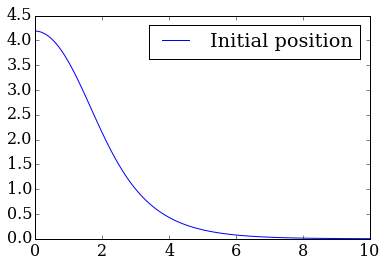

In [3]:
ui=numpy.ones(nx)
w=0.5
ui=4*numpy.arctan(sqrt(1.-w**2)/(w*numpy.cosh(sqrt(1.-w**2)*x)))

plt.plot(x,ui,label='Initial position')
plt.xlim(0,l)
plt.legend(loc='best');

In [4]:
def ctcs(nt,dt,dx,ui,lamda):
    u=numpy.zeros((nt,nx))
    u[0,:]=ui
    u[1,1:-1]=(1-lamda**2)*u[0,1:-1]+lamda**2/2*(u[0,2:]+u[0,:-2])+dt*ui[1:-1]
    for i in range(1,nt-1):
        u[i+1,1:-1] = 2*u[i,1:-1]*(1-lamda**2)+lamda**2.*(u[i,2:]+u[i,:-2])-u[i-1,1:-1]-dt**2*numpy.sin(u[i,1:-1])
        u[i,0]=u[i,1]
        u[i,nx-1]=u[i,nx-2]
    return u

In [5]:
u=ctcs(nt,dt,dx,ui,lamda)

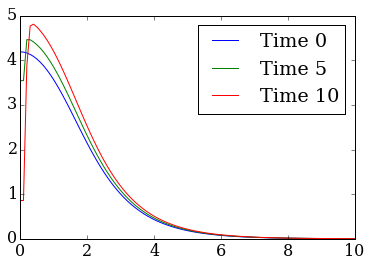

In [6]:
plt.figure(2)
plt.plot(x,u[0,:], label='Time 0')
plt.plot(x,u[4,:], label='Time 5')
plt.plot(x,u[9,:], label='Time 10')
plt.legend(loc='best')


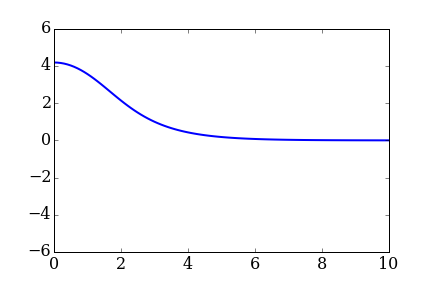
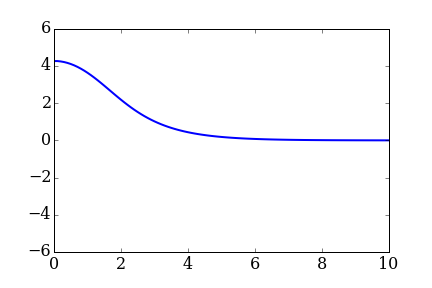
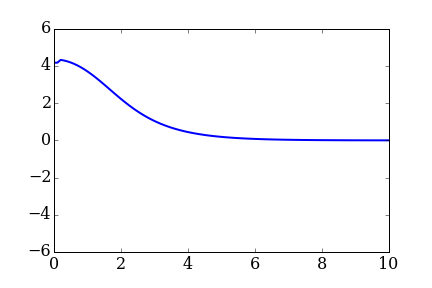
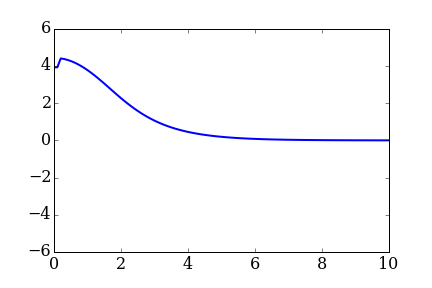
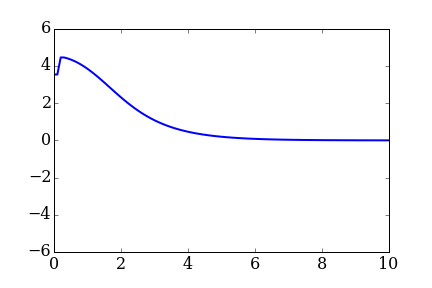
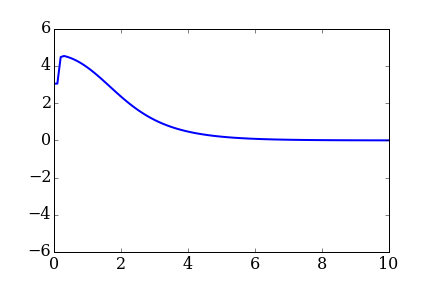
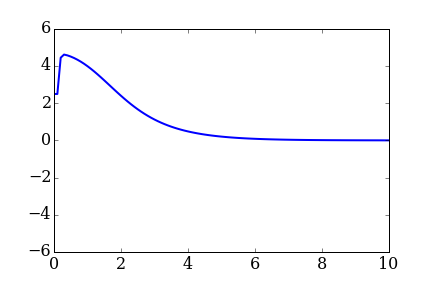
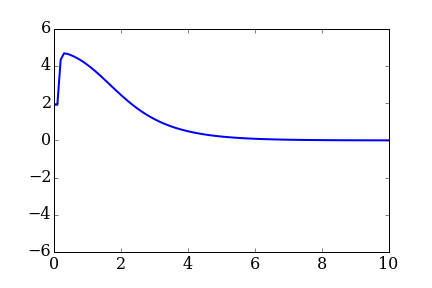
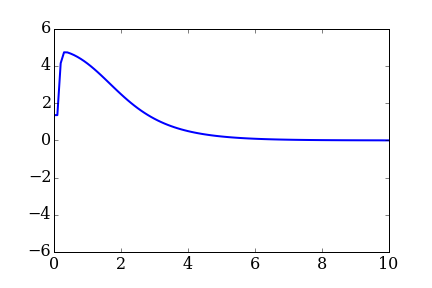
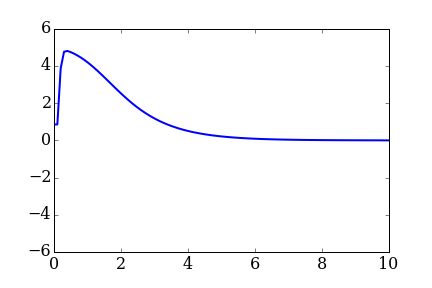
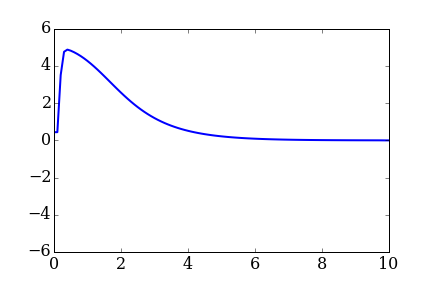
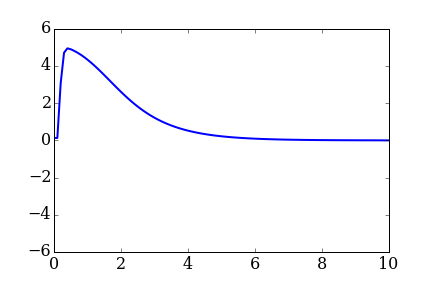
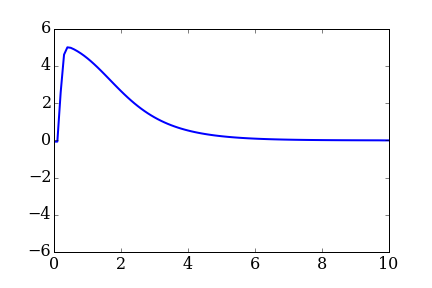
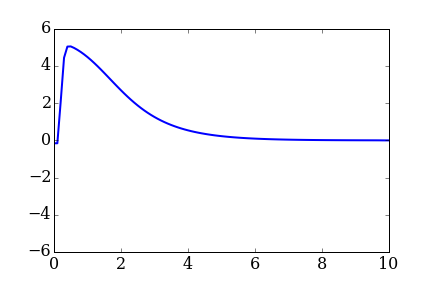
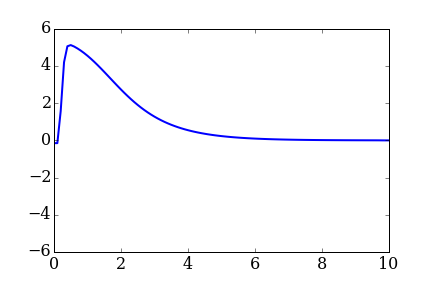
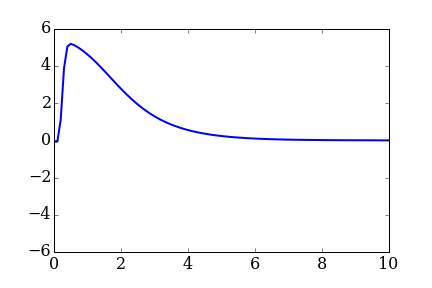
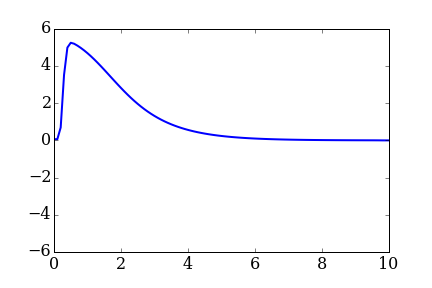
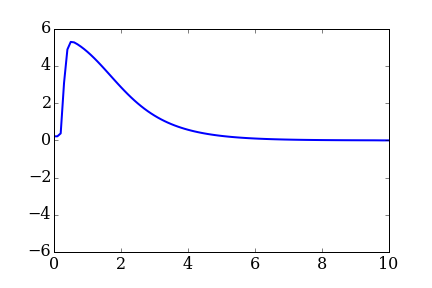
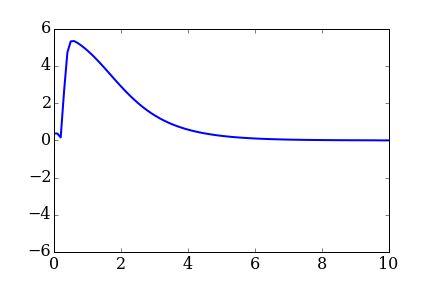
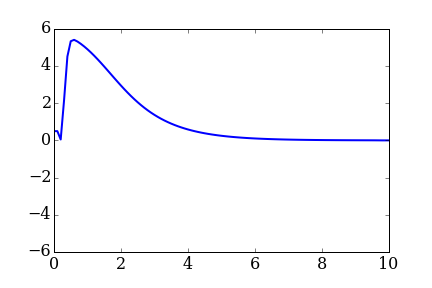
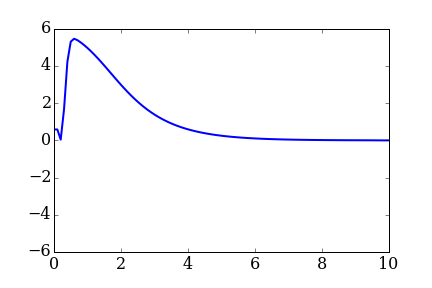
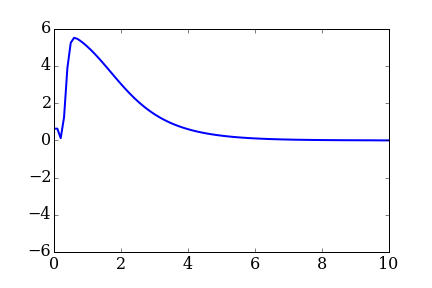
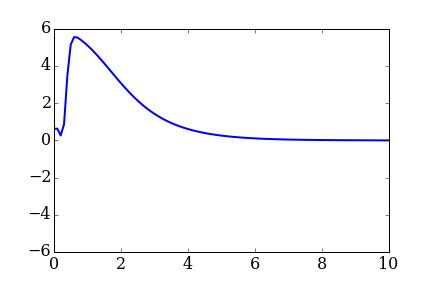
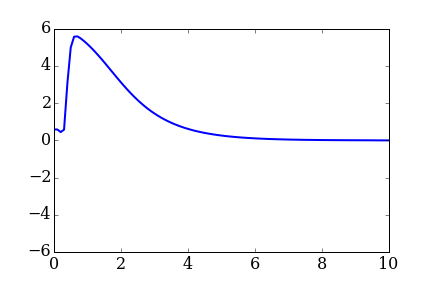
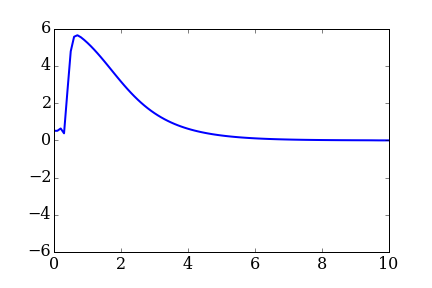
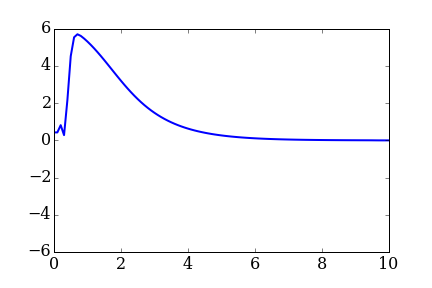
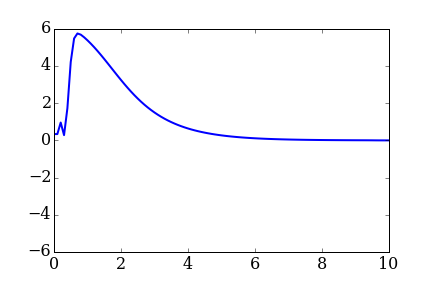
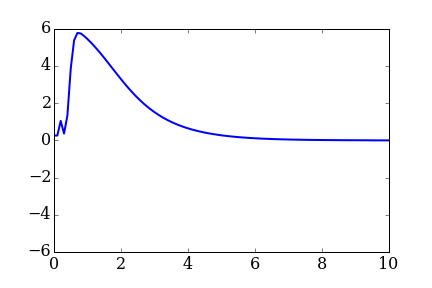
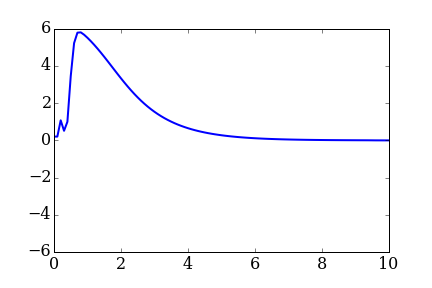
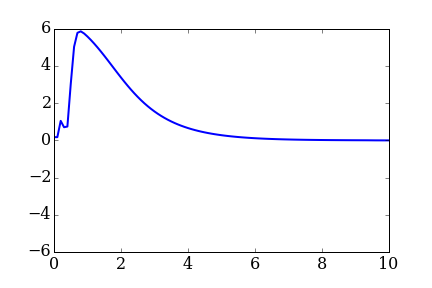
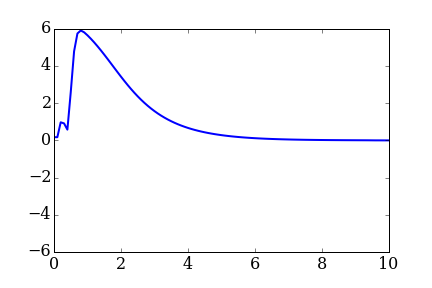
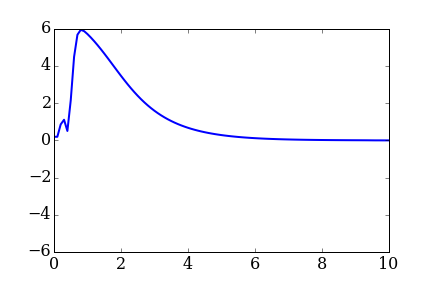
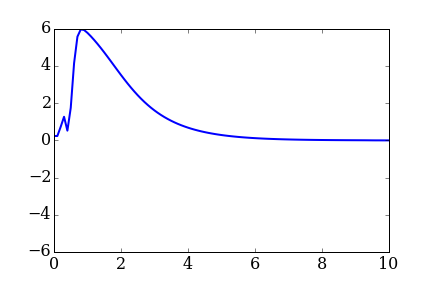
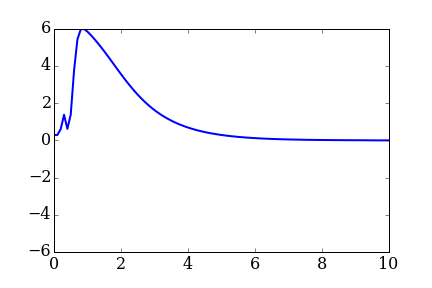
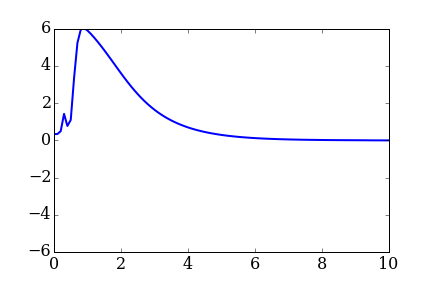
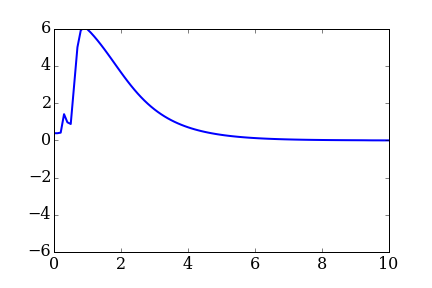
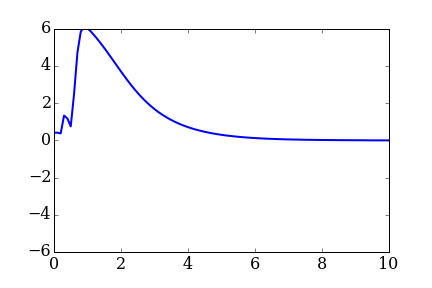
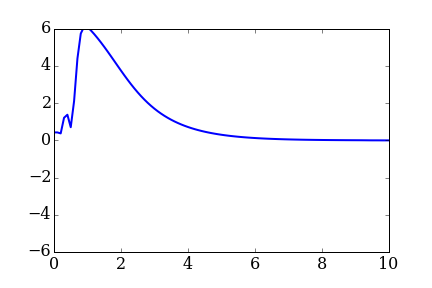
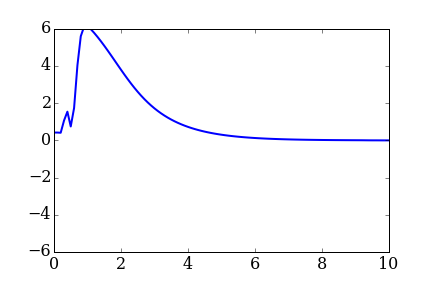
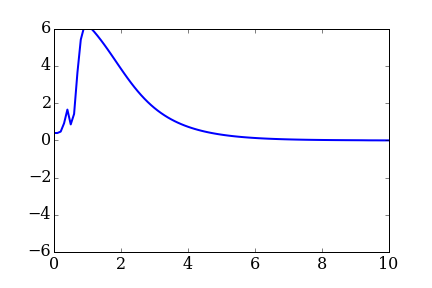
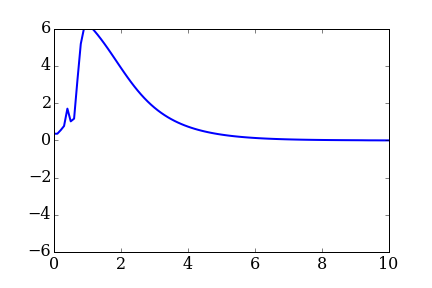
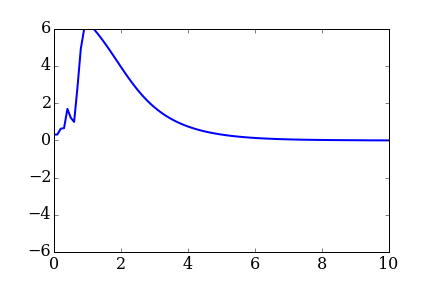
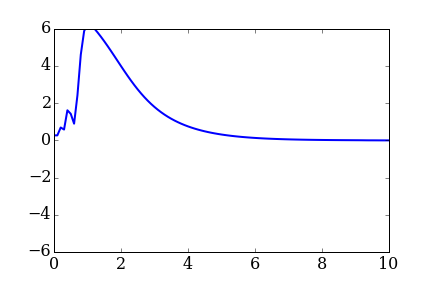
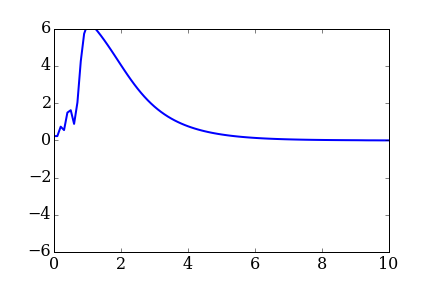
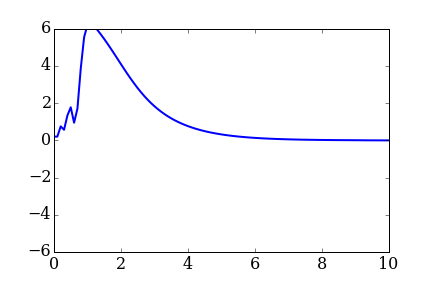
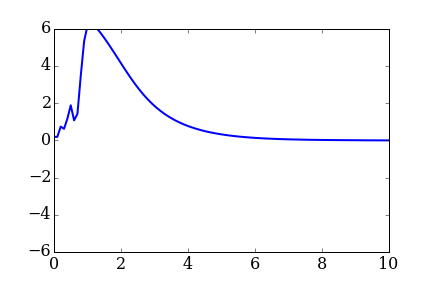
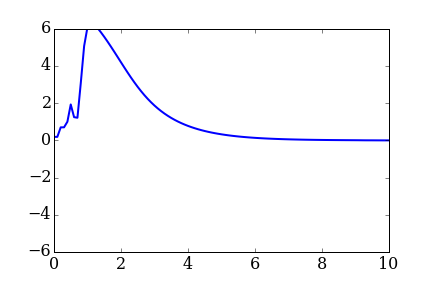
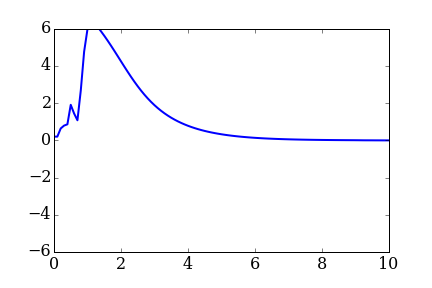
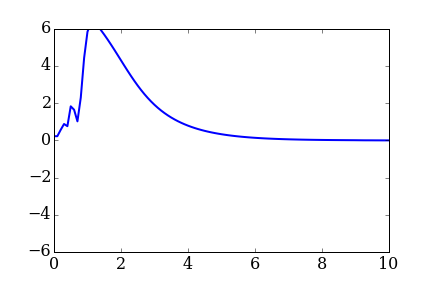
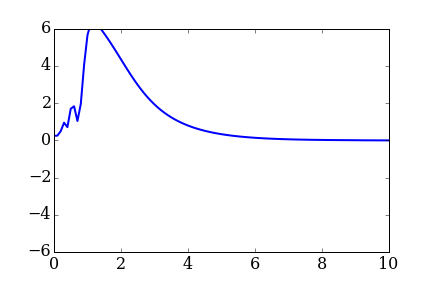
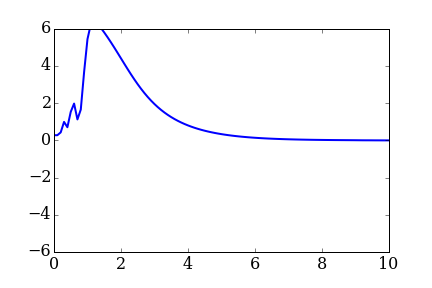
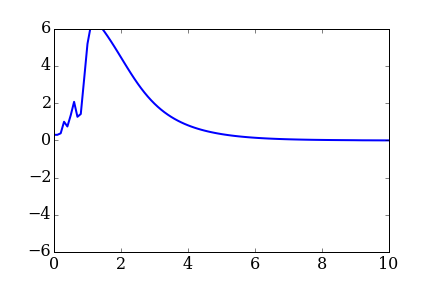
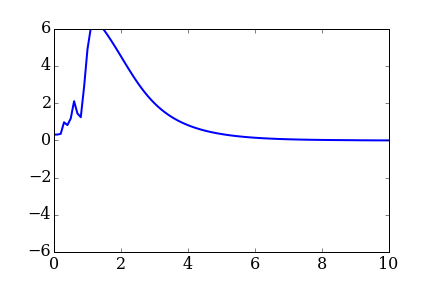
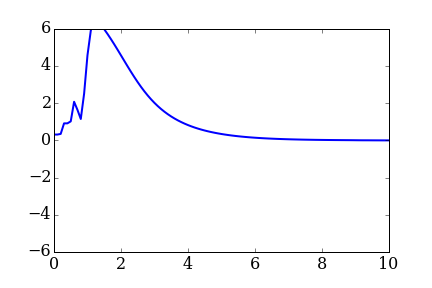
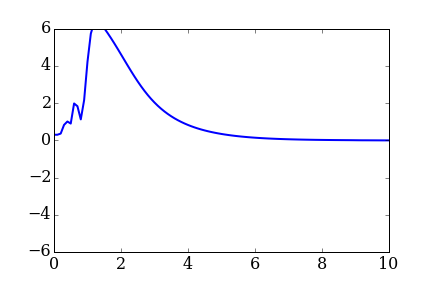
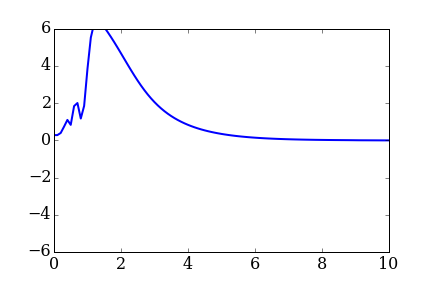
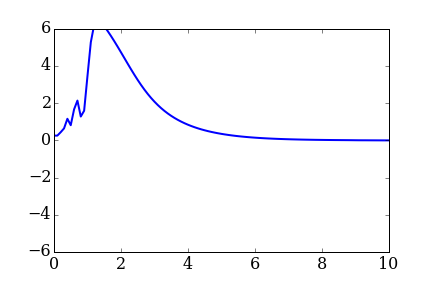
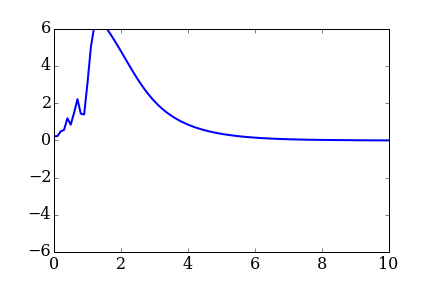
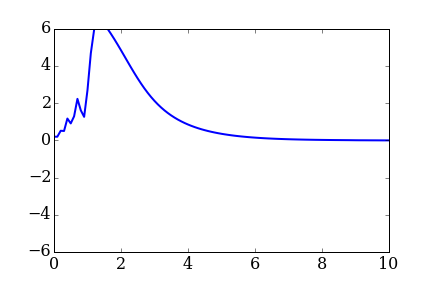
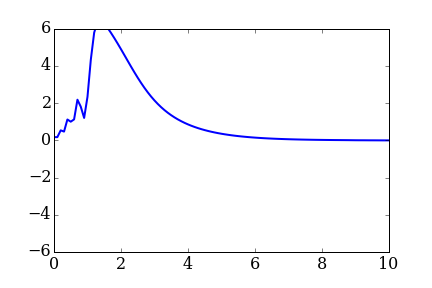
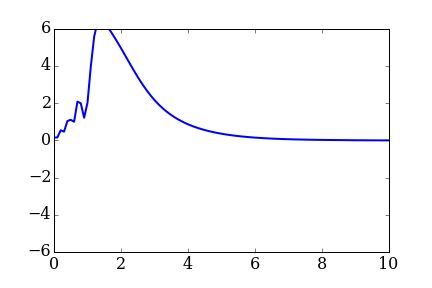
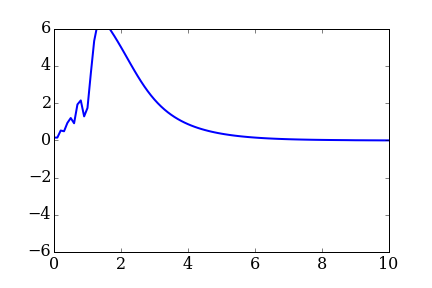
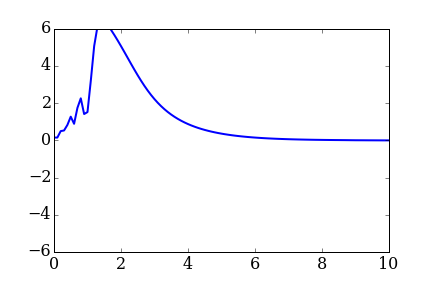
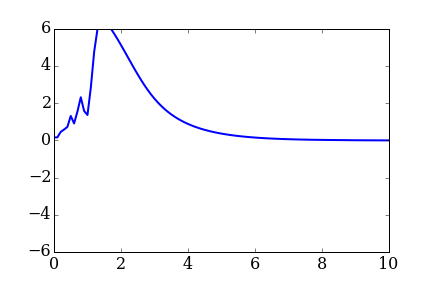
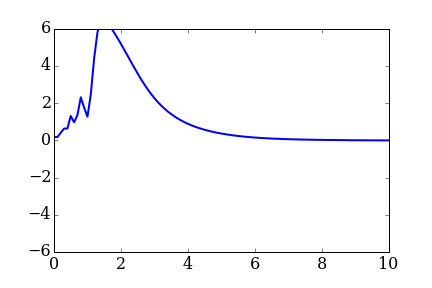
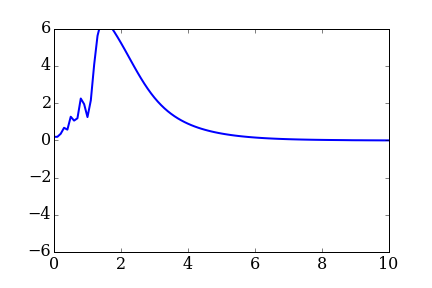
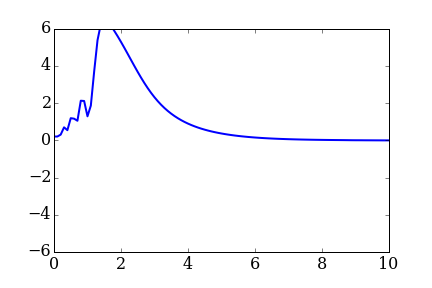
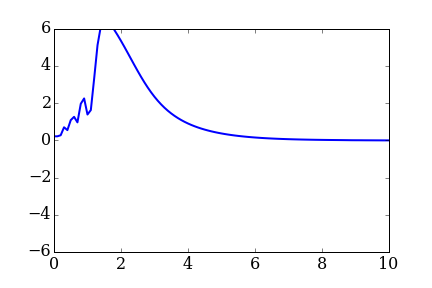
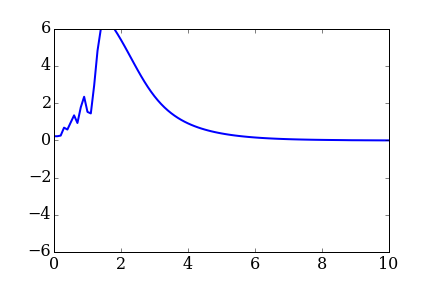
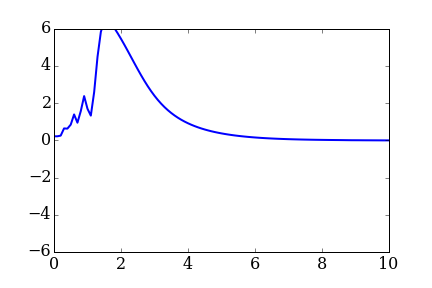
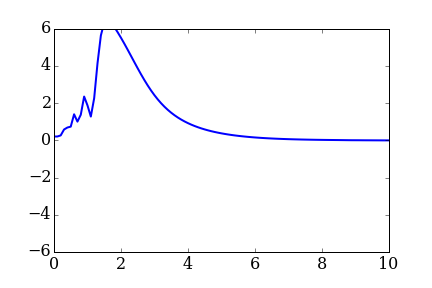
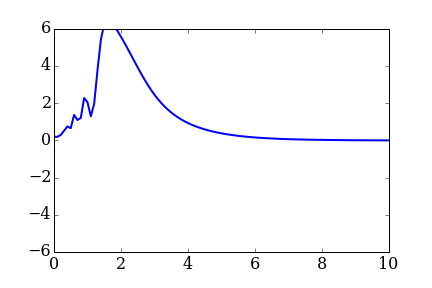
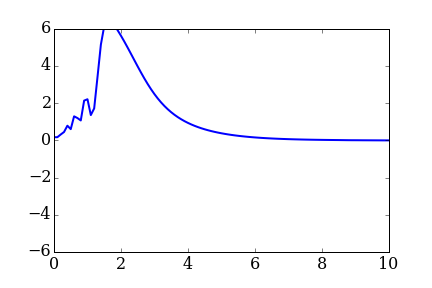
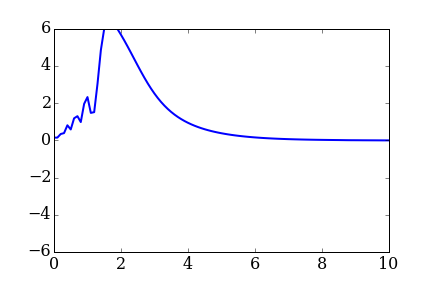
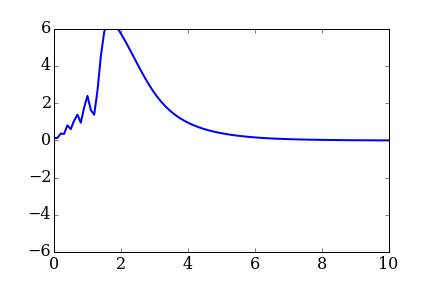
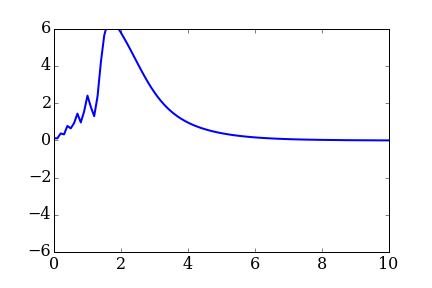
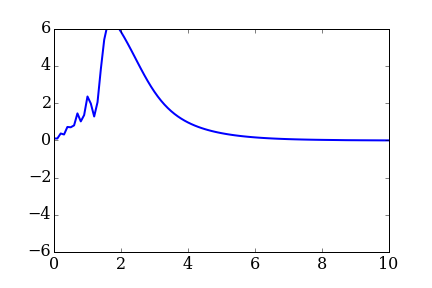
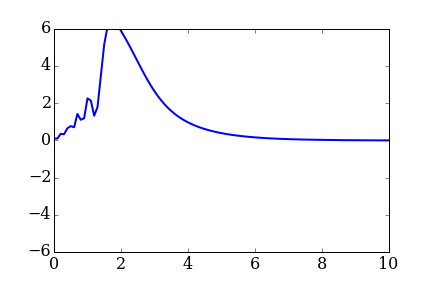
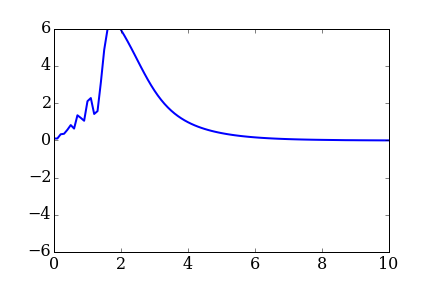
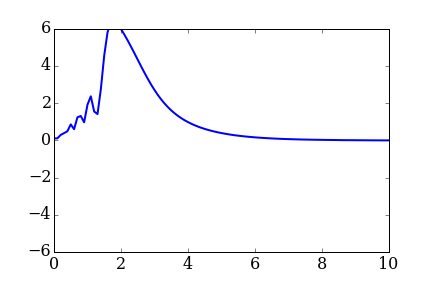
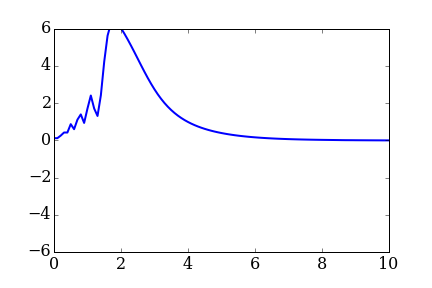
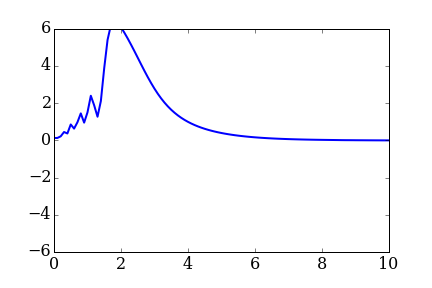
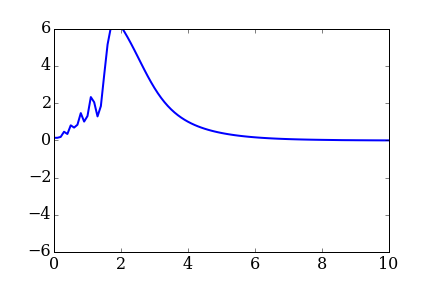
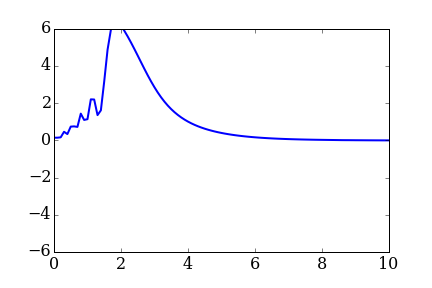
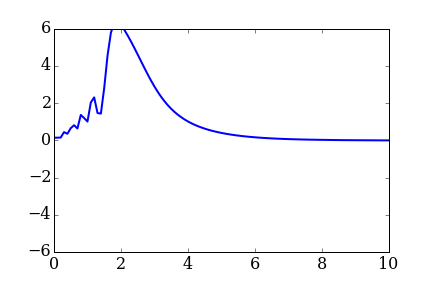
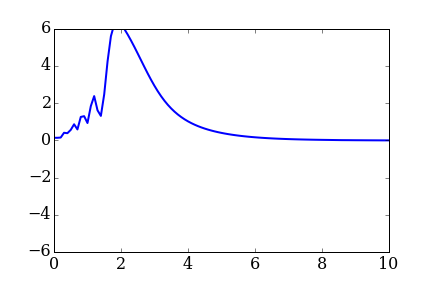
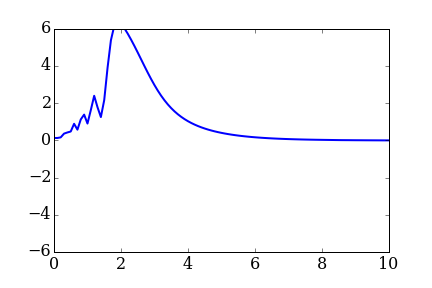
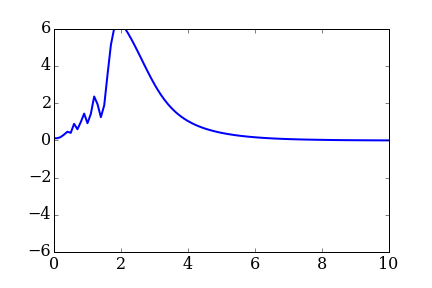
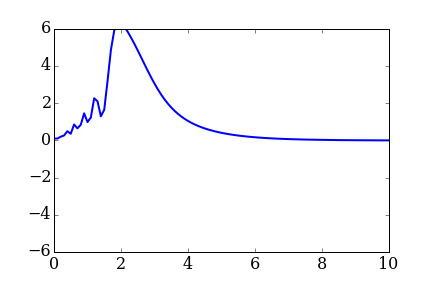
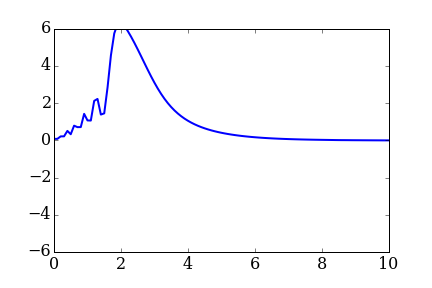
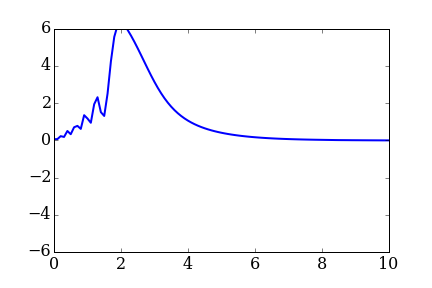
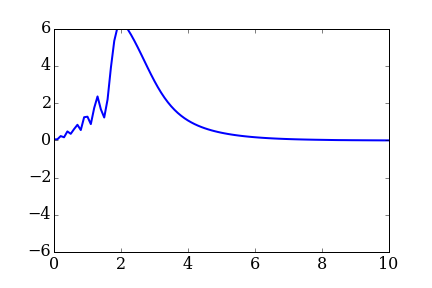
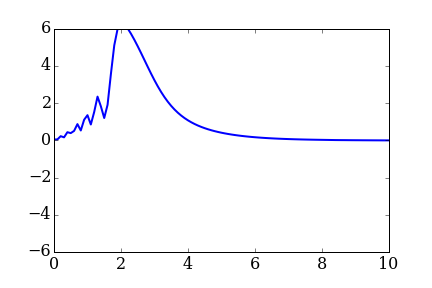
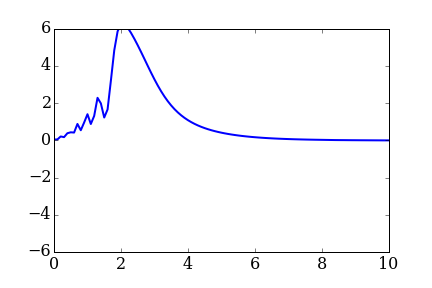
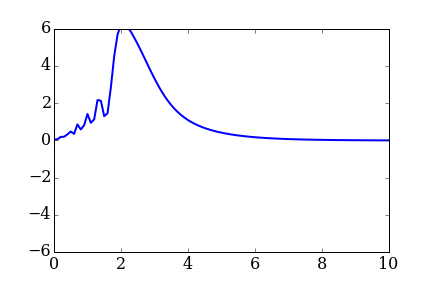
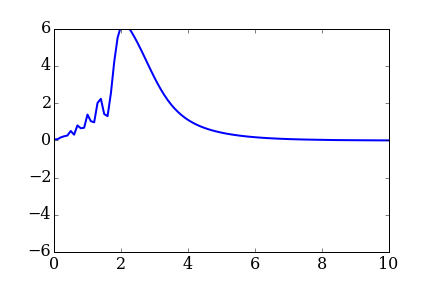
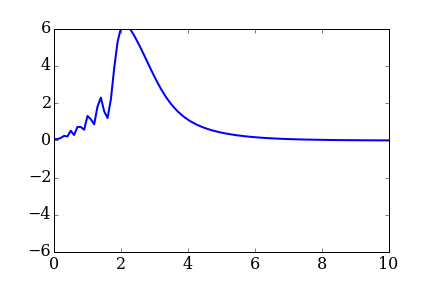
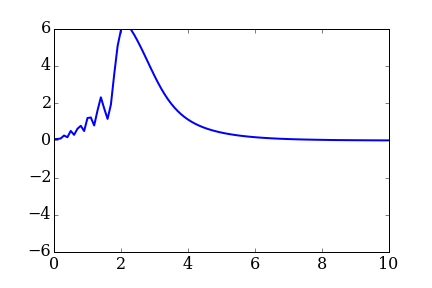
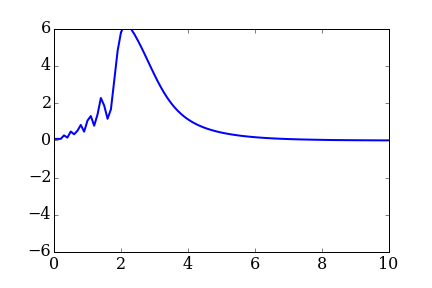
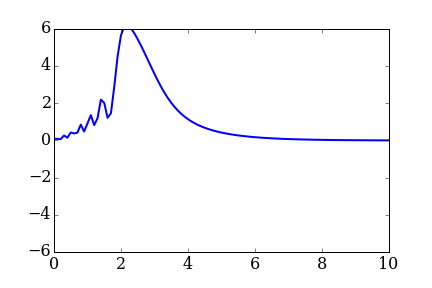
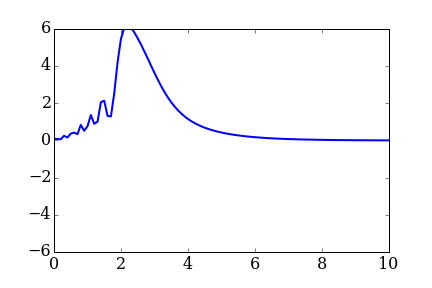
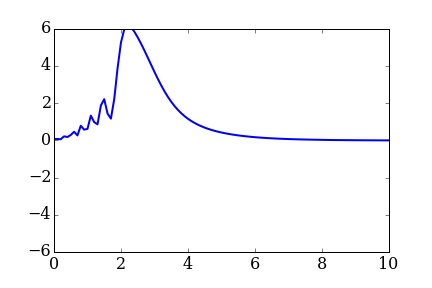
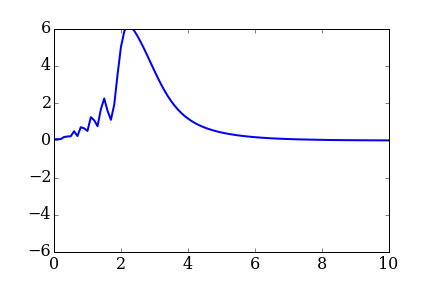
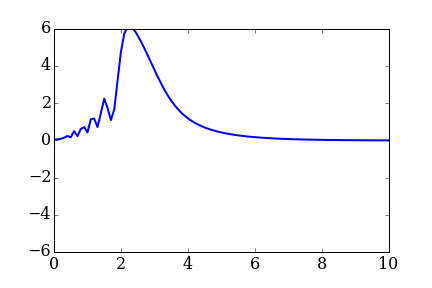
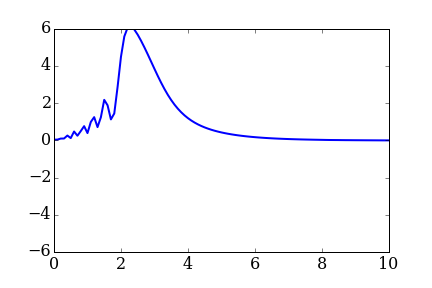
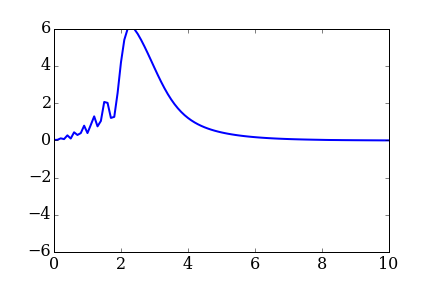
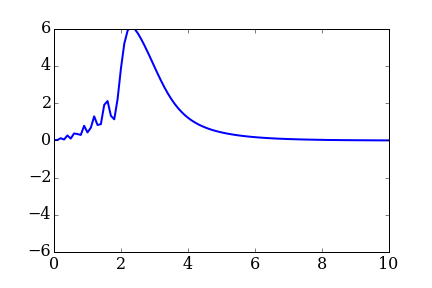
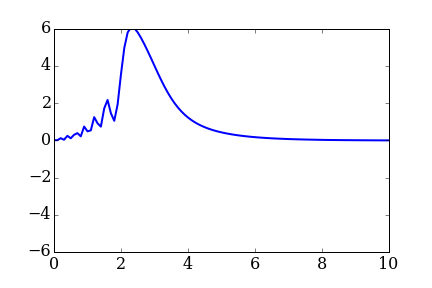
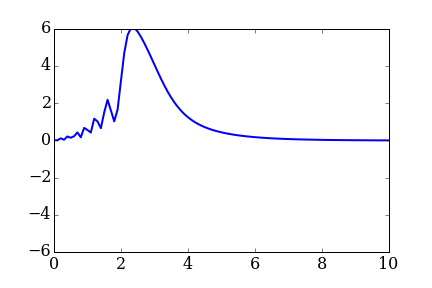
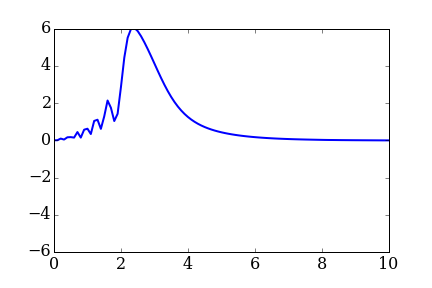
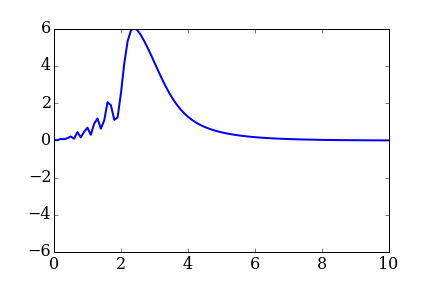
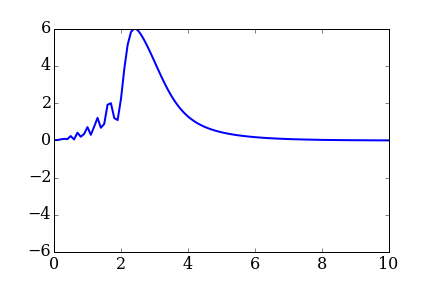
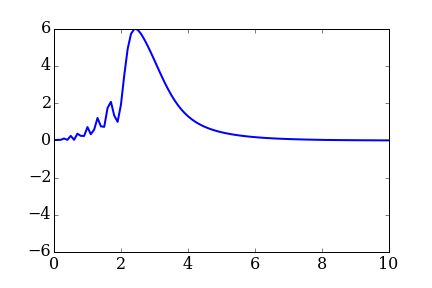
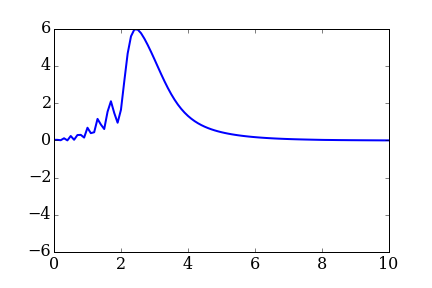
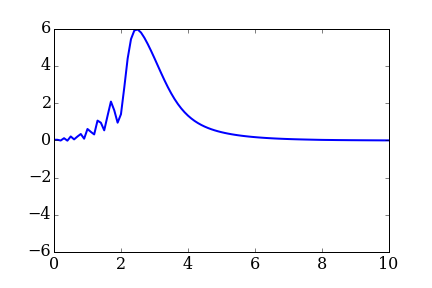
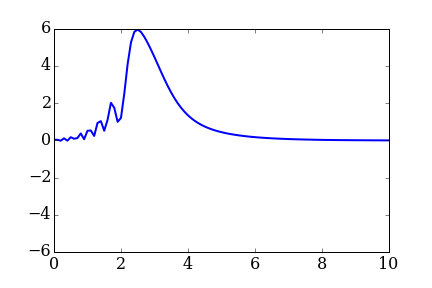
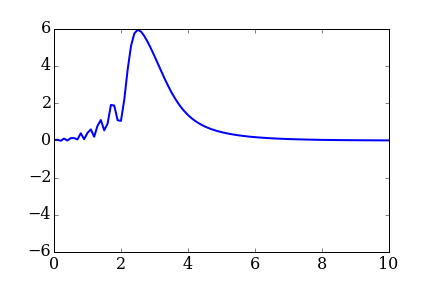
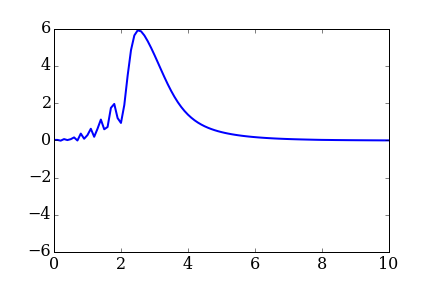
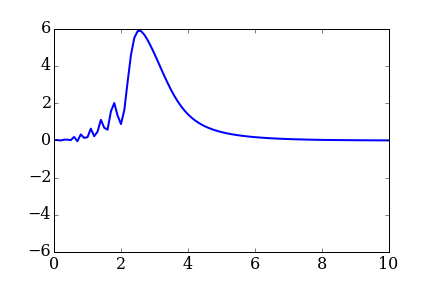
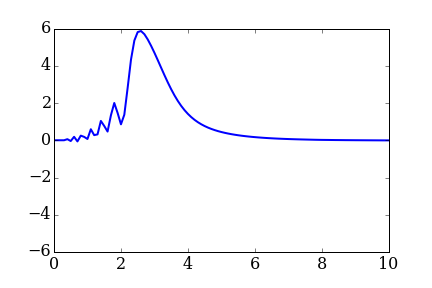
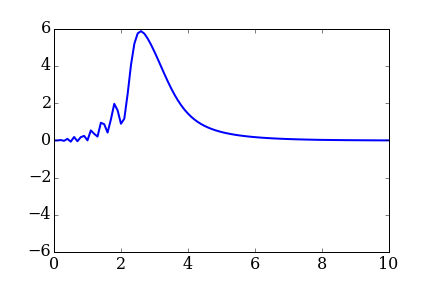
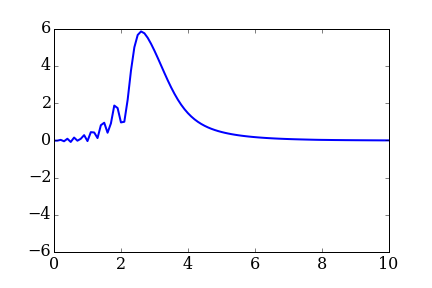
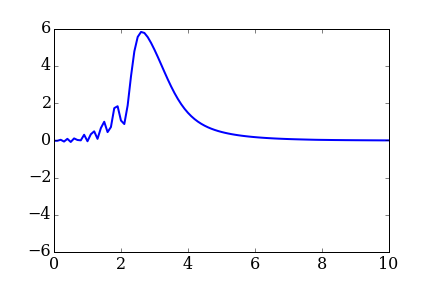
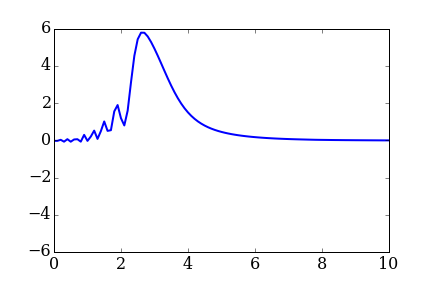
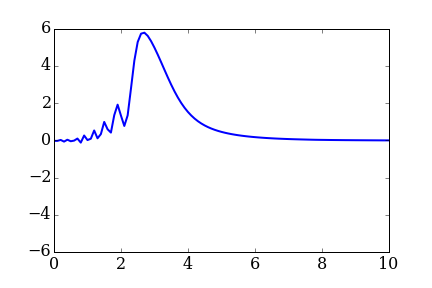
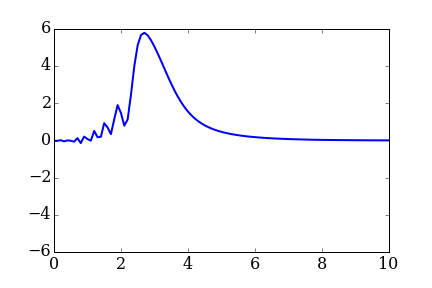
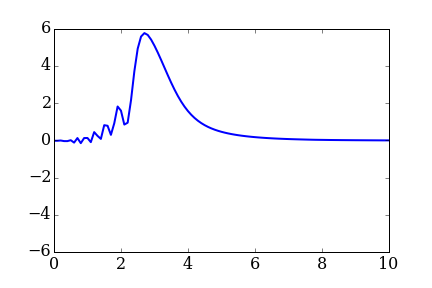
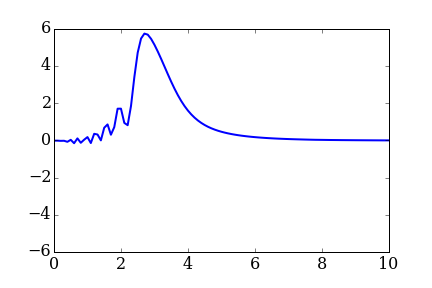
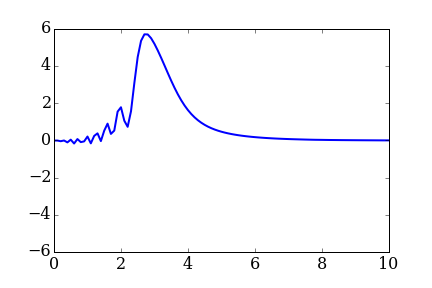
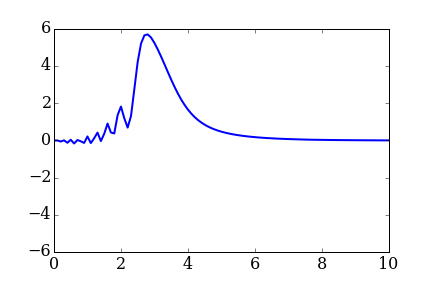
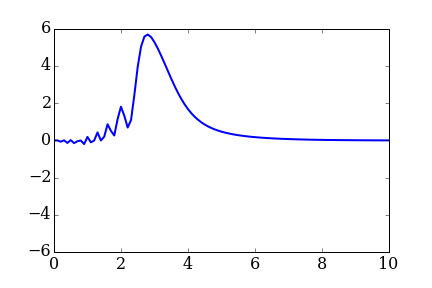
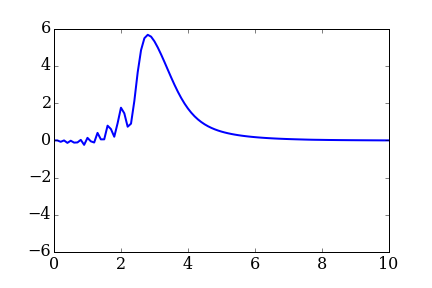
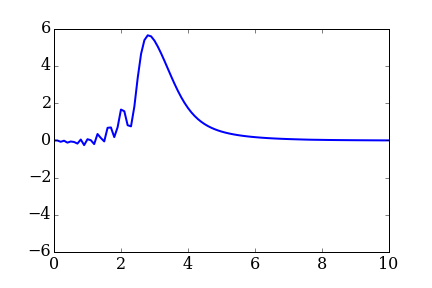
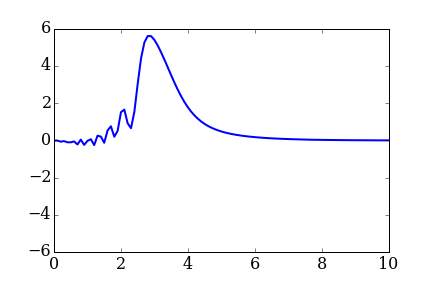
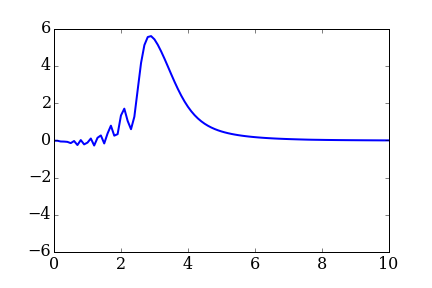
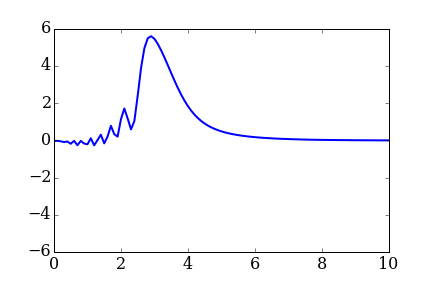
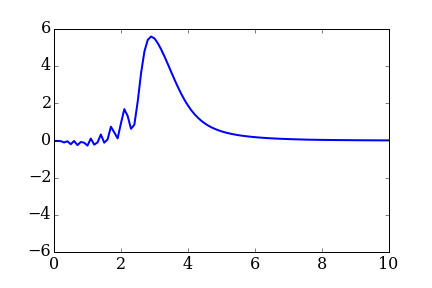
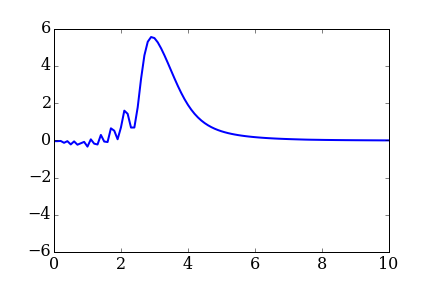
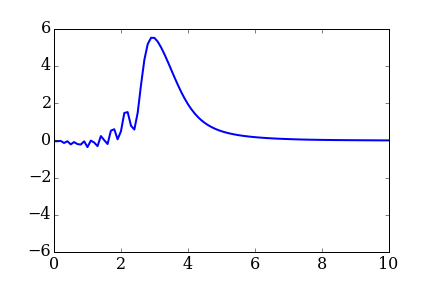
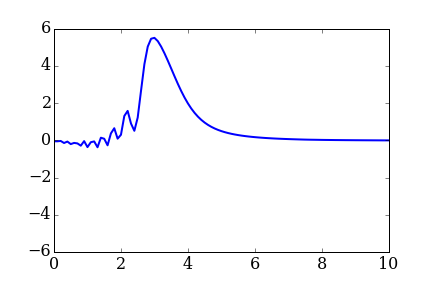
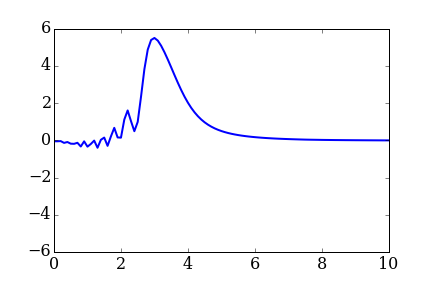
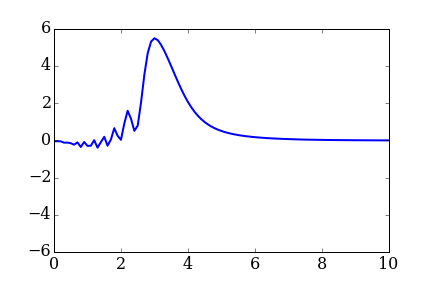
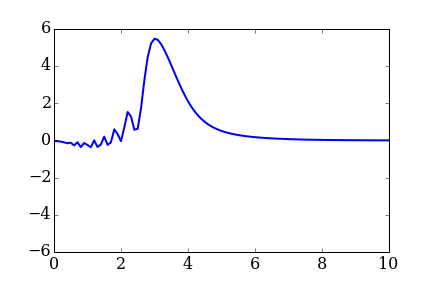
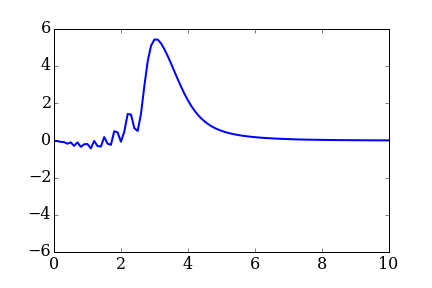
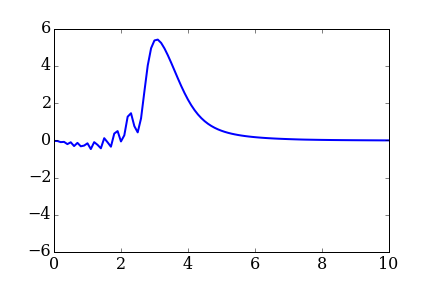
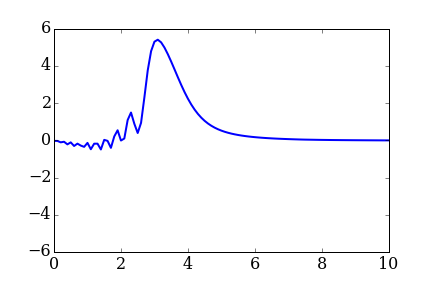
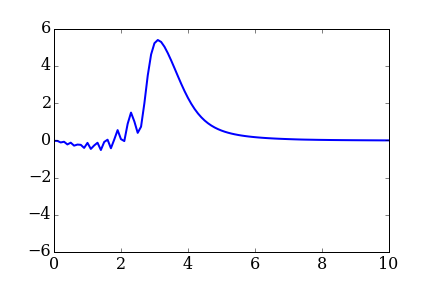
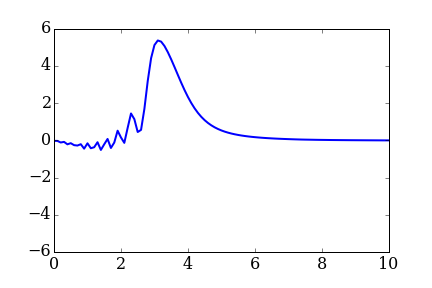
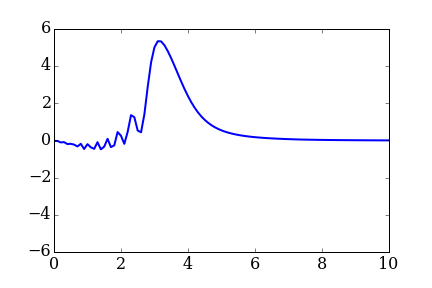
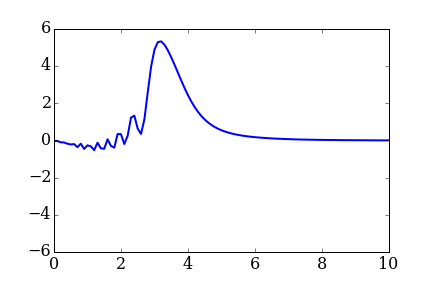
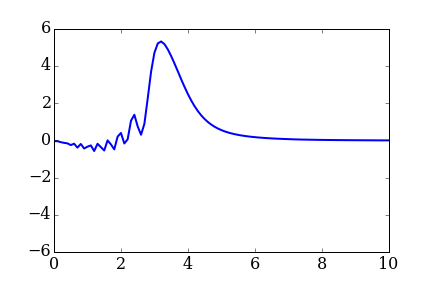
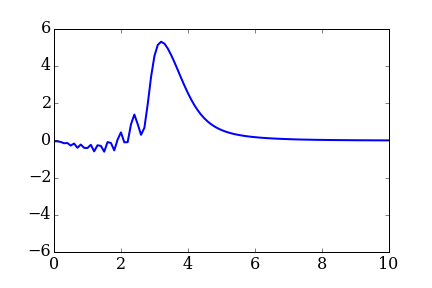
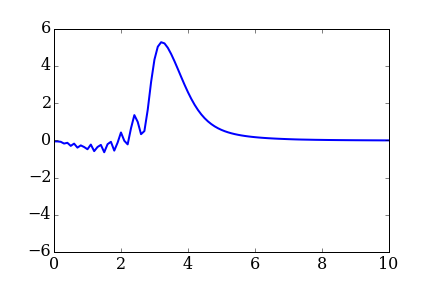
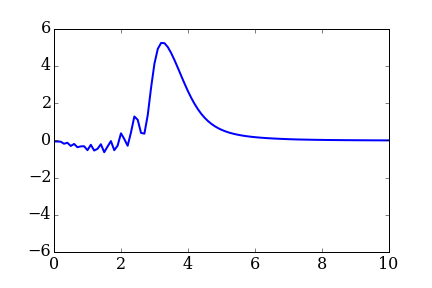
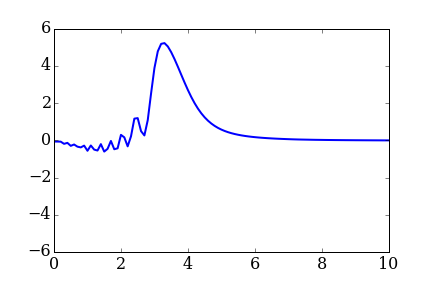
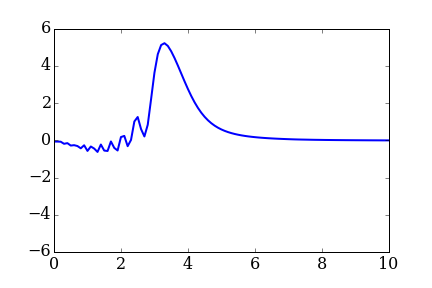
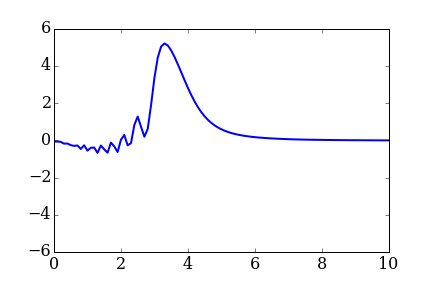
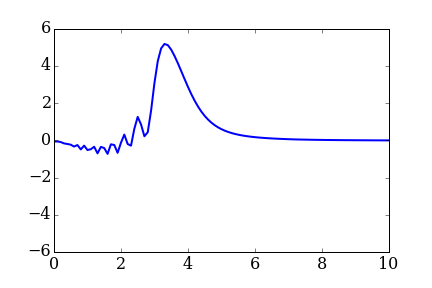
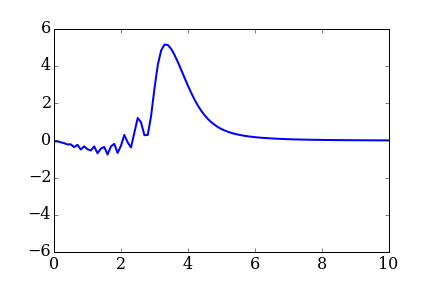
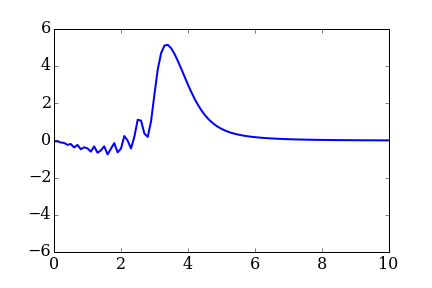
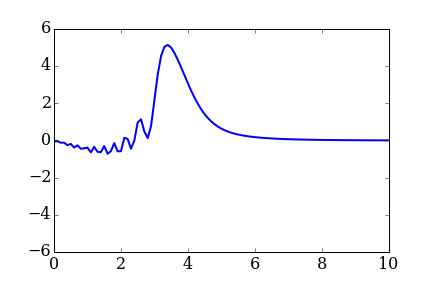
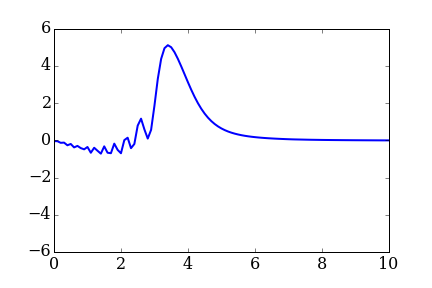
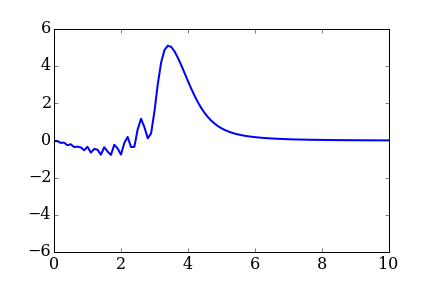
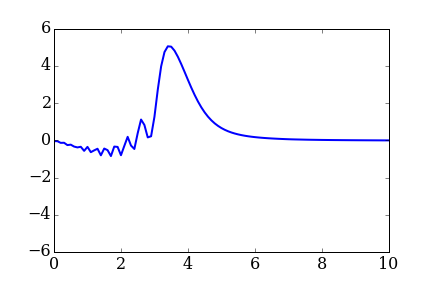
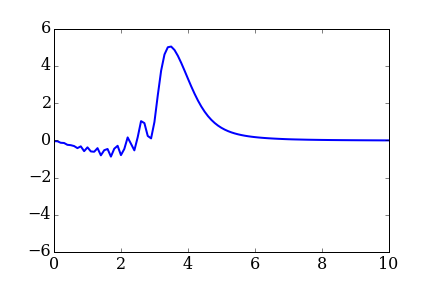
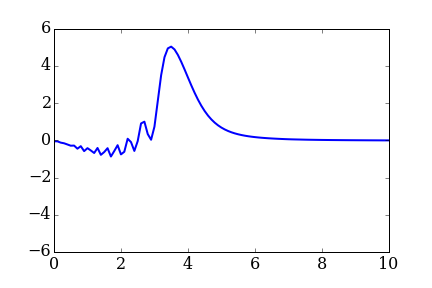
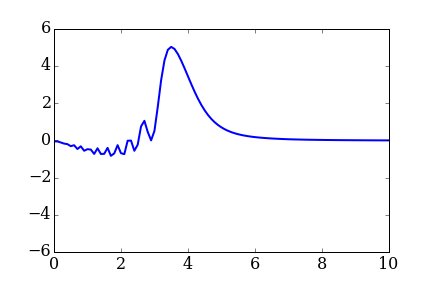
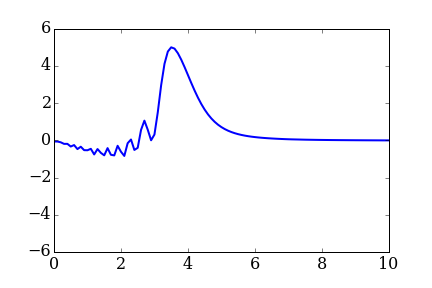
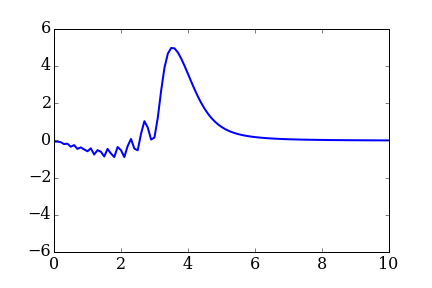
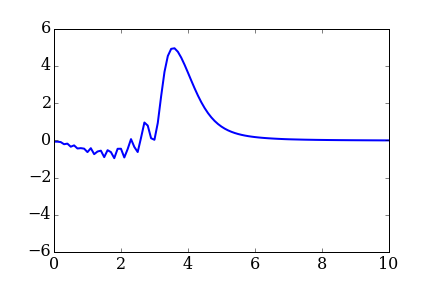
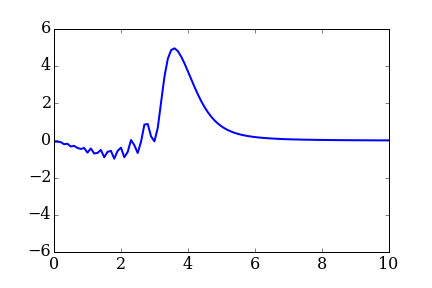
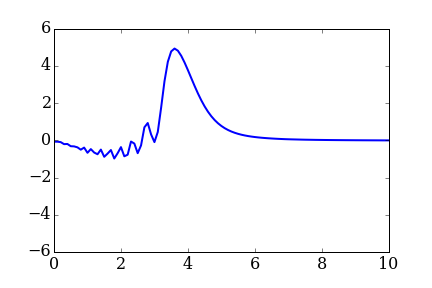
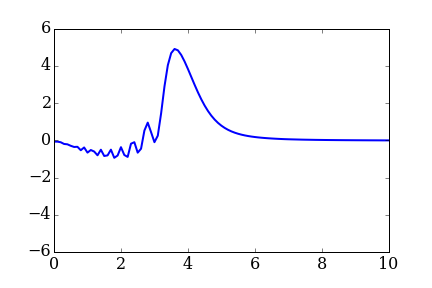
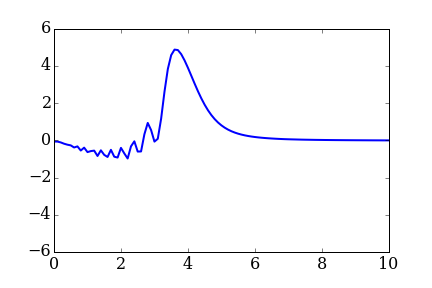
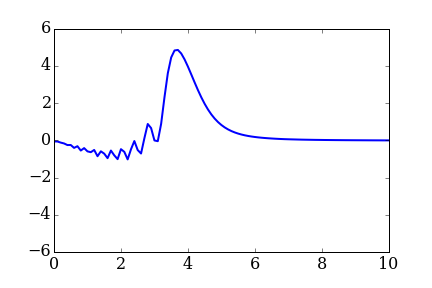
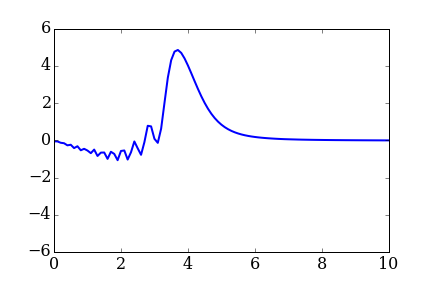
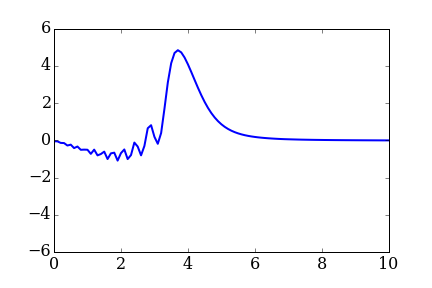
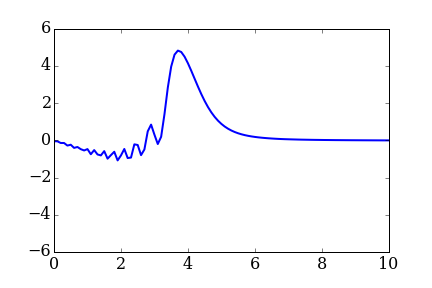
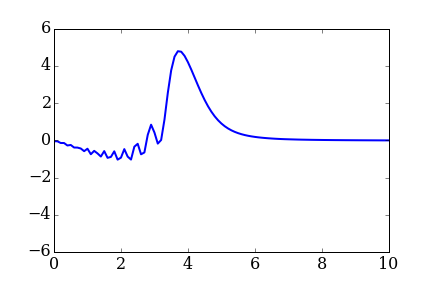
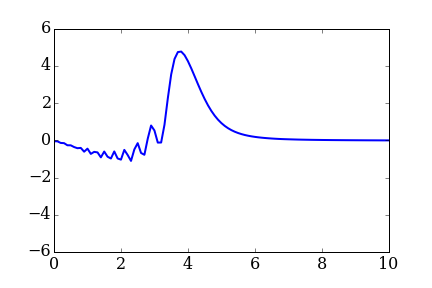
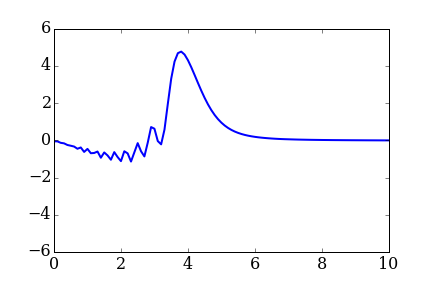
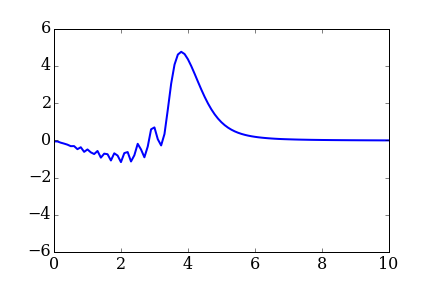
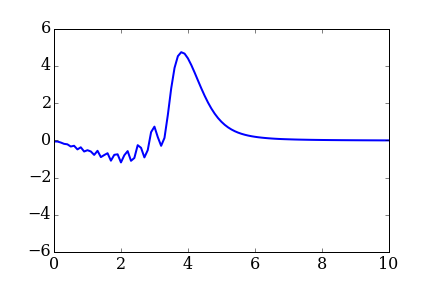
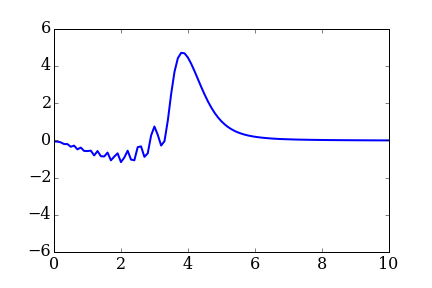
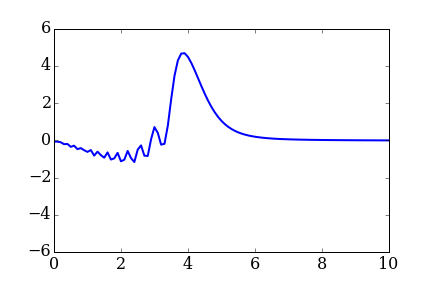
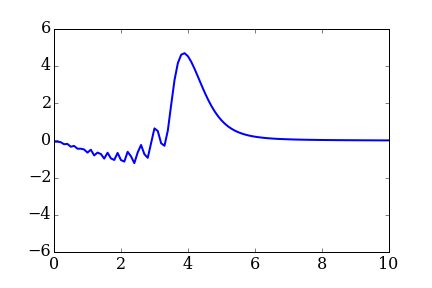
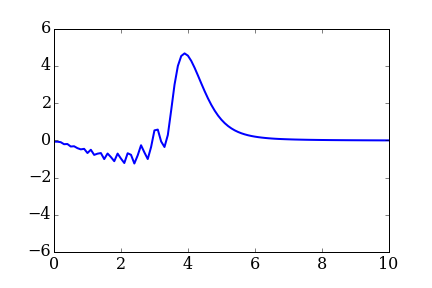
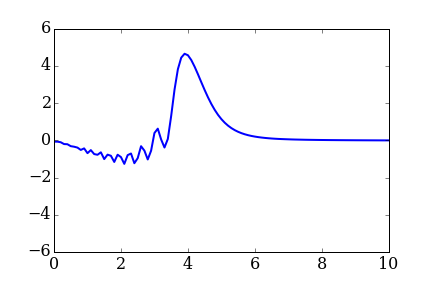
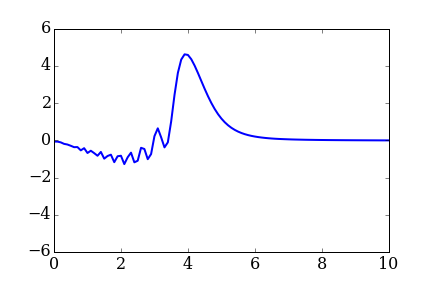
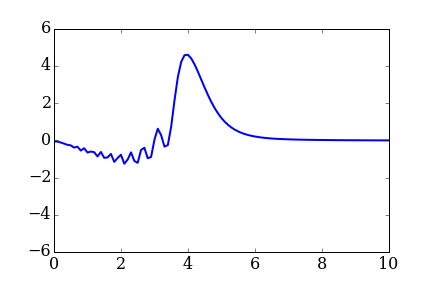
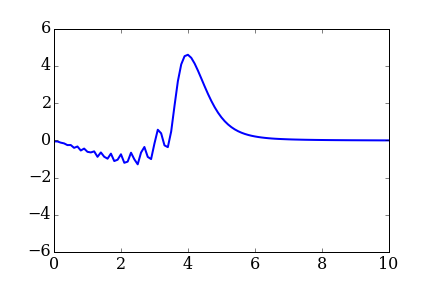
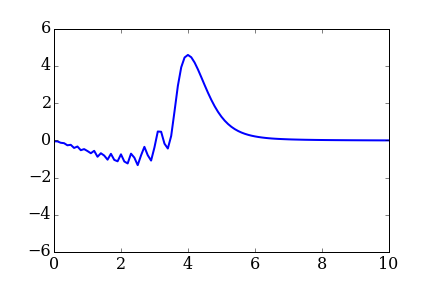
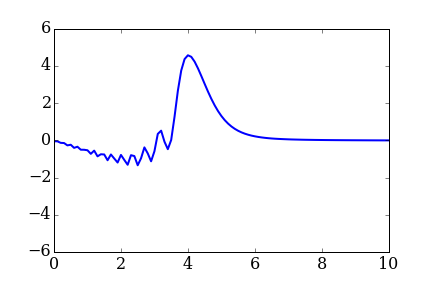
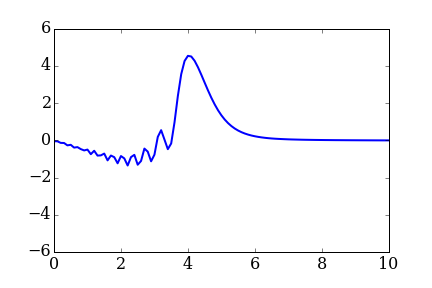
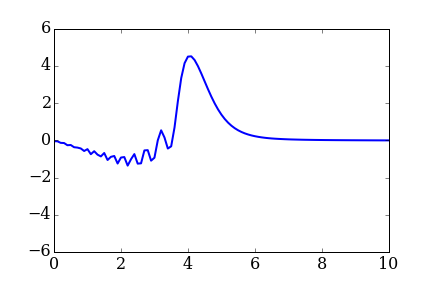
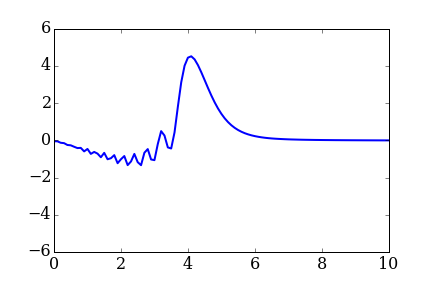
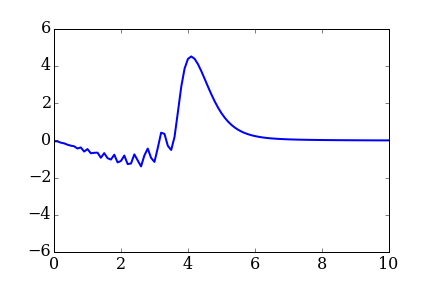
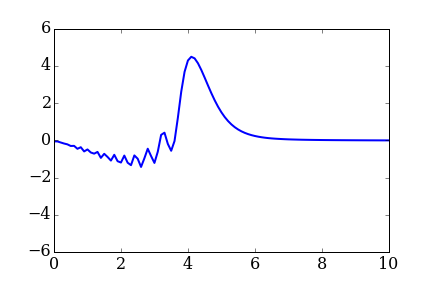
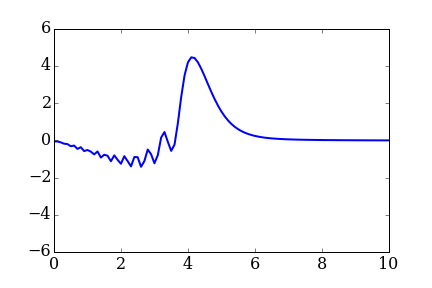
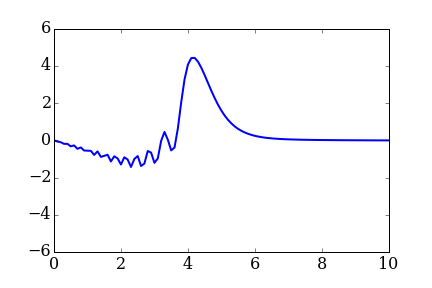

In [7]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

def animate(data):
    x = numpy.linspace(0,l,nx)
    y = data
    line.set_data(x,y)
    return line,

fig = plt.figure();
ax = plt.axes(xlim=(0,10),ylim=(-6,6));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=u, interval=50)
display_animation(anim, default_mode='reflect')